In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Data/cc_india.csv")
df.head()

/home/msc2/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/msc2/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [13]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract Month Name for Month-wise analysis
df['Month'] = df['Date'].dt.strftime('%b')

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

  Gender         sum           mean  count
0      F  2205311030  161206.946637  13680
1      M  1869522343  151109.145086  12372


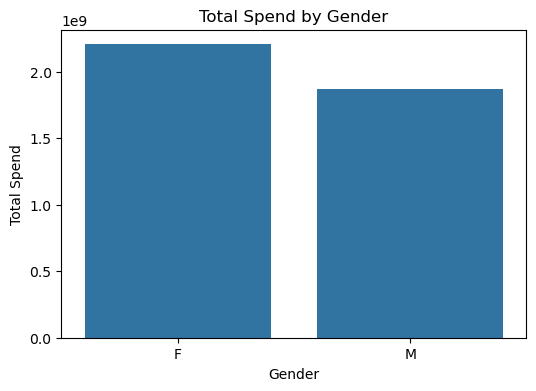

In [24]:
# Group by Gender
gender_spend = df.groupby('Gender')['Amount'].agg(['sum', 'mean', 'count']).reset_index()
print(gender_spend)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='sum', data=gender_spend)
plt.title('Total Spend by Gender')
plt.ylabel('Total Spend')
plt.xlabel('Gender')
plt.show()


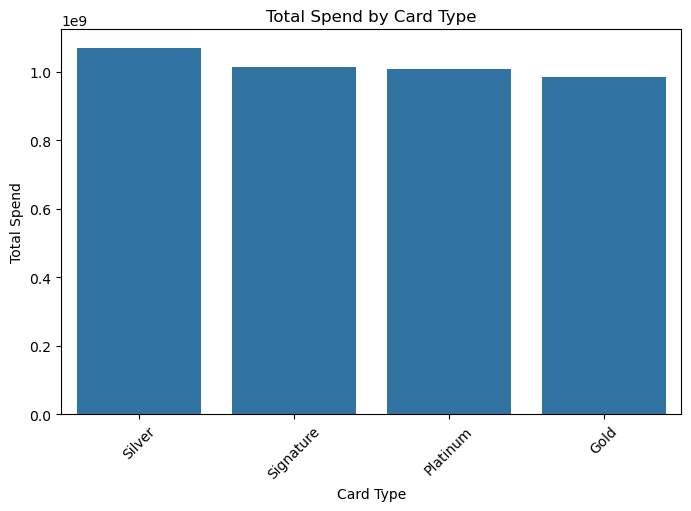

In [23]:
# Group by Card Type
card_spend = df.groupby('Card Type')['Amount'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Card Type', y='Amount', data=card_spend)
plt.title('Total Spend by Card Type')
plt.ylabel('Total Spend')
plt.xlabel('Card Type')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_35662/1693628078.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_wise_spend = df.groupby('Month')['Amount'].sum().reset_index()


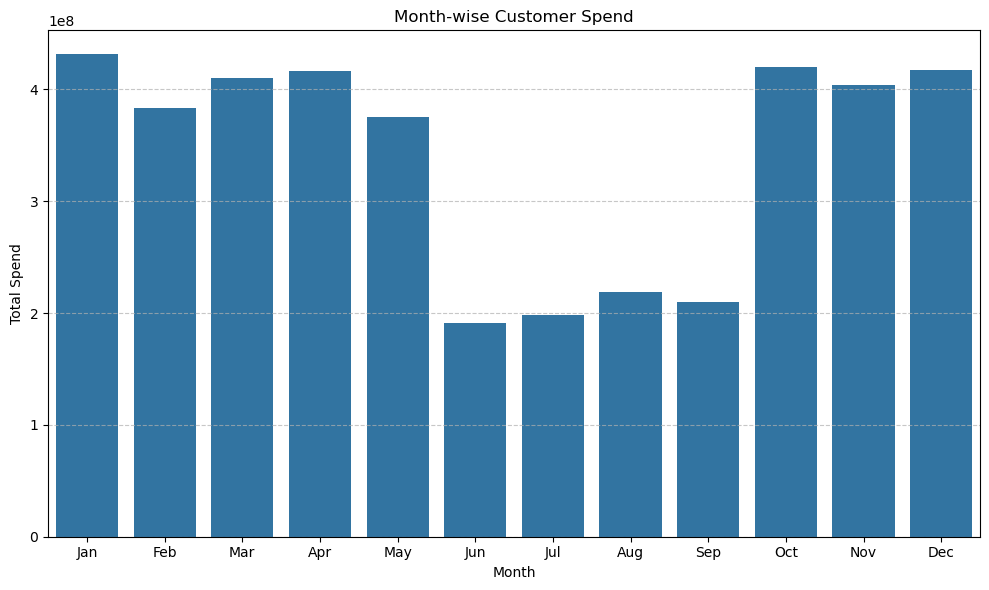

In [17]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract month name
df['Month'] = df['Date'].dt.strftime('%b')

# Optional: Order months for correct plotting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by month and sum the Amount
month_wise_spend = df.groupby('Month')['Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=month_wise_spend, x='Month', y='Amount')
plt.title('Month-wise Customer Spend')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


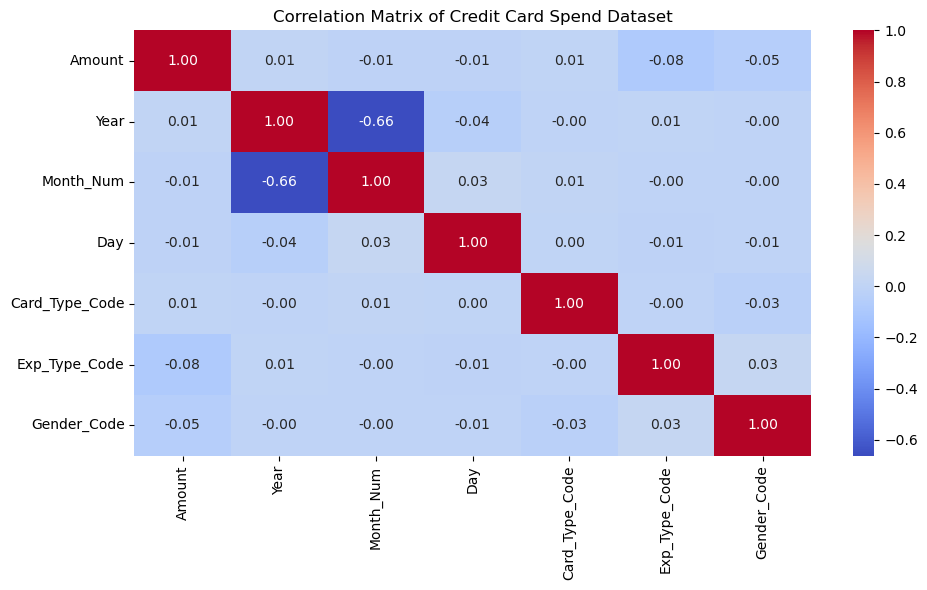

In [18]:
# Feature engineering for correlation
df['Year'] = df['Date'].dt.year
df['Month_Num'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Optionally: Convert categorical features to numerical codes
df['Card_Type_Code'] = df['Card Type'].astype('category').cat.codes
df['Exp_Type_Code'] = df['Exp Type'].astype('category').cat.codes
df['Gender_Code'] = df['Gender'].astype('category').cat.codes

# Select relevant columns for correlation
corr_df = df[['Amount', 'Year', 'Month_Num', 'Day', 'Card_Type_Code', 'Exp_Type_Code', 'Gender_Code']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Display correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Credit Card Spend Dataset')
plt.tight_layout()
plt.show()

                      City        sum  count
170  Greater Mumbai, India  576751476   3493
71        Bengaluru, India  572326739   3552
8         Ahmedabad, India  567794310   3491
126           Delhi, India  556929212   3482
267         Kolkata, India  115466943    773
300         Lucknow, India  115334476    759
109         Chennai, India  114730600    774
193       Hyderabad, India  114493477    784
821           Surat, India  114486151    749
237          Kanpur, India  114370532    764


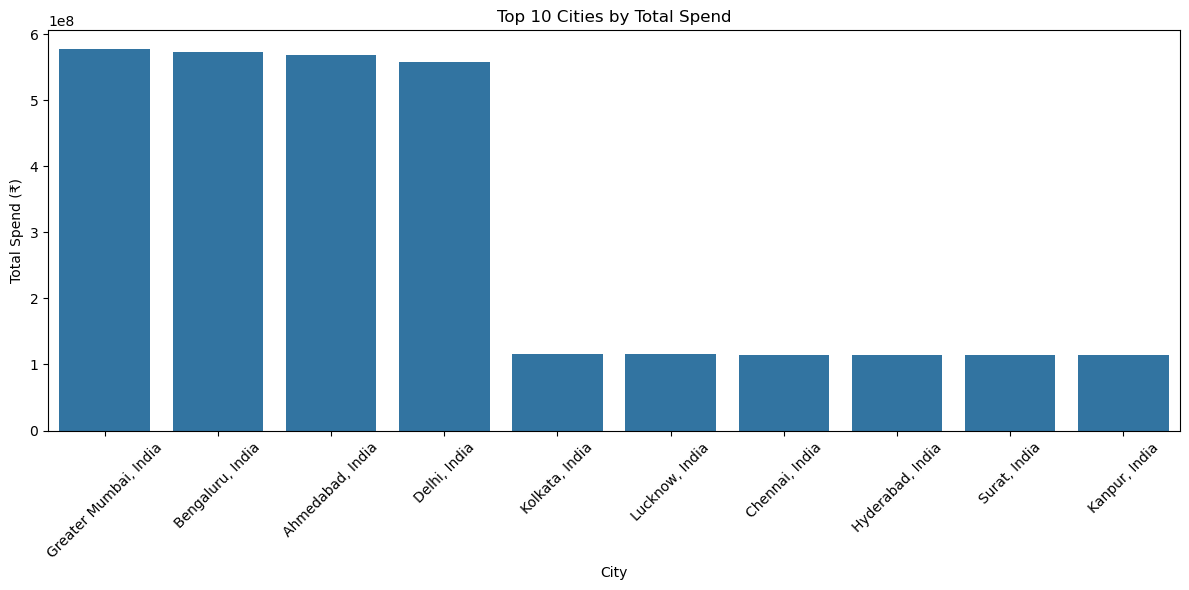

In [19]:
# Group by City: Total spend and transaction count
city_spend = df.groupby('City')['Amount'].agg(['sum', 'count']).reset_index().sort_values(by='sum', ascending=False)

print(city_spend.head(10))  # Top 10 cities by spend
plt.figure(figsize=(12,6))
sns.barplot(data=city_spend.head(10), x='City', y='sum')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by Total Spend')
plt.ylabel('Total Spend (₹)')
plt.xlabel('City')
plt.tight_layout()
plt.show()


Exp Type  Bills  Entertainment  Food  Fuel  Grocery  Travel
Gender                                                     
F          2860           2384  3012  2617     2428     379
M          2218           2378  2451  2640     2326     359


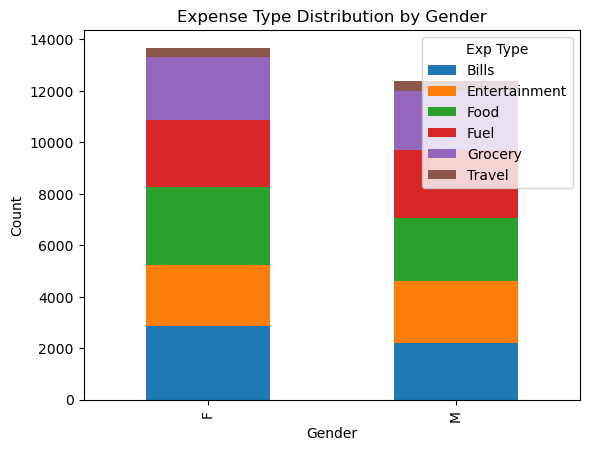

In [20]:
expense_gender = df.groupby(['Gender', 'Exp Type']).size().unstack(fill_value=0)

print(expense_gender)
expense_gender.plot(kind='bar', stacked=True)
plt.title("Expense Type Distribution by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()


0        False
1        False
2        False
3        False
4        False
         ...  
26047    False
26048    False
26049    False
26050    False
26051    False
Name: outlier, Length: 26052, dtype: bool


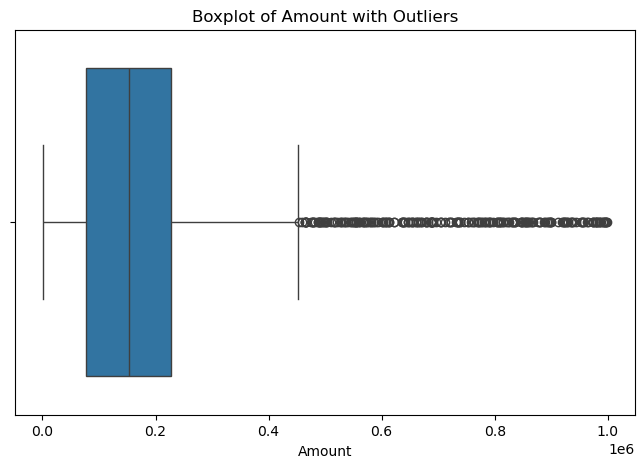

In [4]:

q1=df['Amount'].quantile(0.25)
q3=df['Amount'].quantile(0.75)
IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

df['outlier'] = ((df['Amount'] < lower_bound) | (df['Amount'] > upper_bound))

print(df['outlier'])

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount with Outliers')
plt.xlabel('Amount')
plt.show()

In [5]:

# Total number of outliers
total_outliers = df['outlier'].sum()
print("Total outliers:", total_outliers)

Total outliers: 229
